# Bike Case Study

## Date Ingestion

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("day.csv")

In [4]:
display(df.head())
df.info()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Preparation 

### Initial Analysis
Done by inspecting it in excel and data frame

| Column       | Data Type | Notes                                                                 |
|--------------|-----------|-----------------------------------------------------------------------|
| instant      | int64     | Unique Identifier, not to be used in regression                       |
| dteday       | object    | Kept only for later, but won't be used in regression since other columns can explain the date |
| season       | int64     | To be converted to dummy variables                                    |
| yr           | int64     | Can be kept as is considering 2020 will be 3 and so on...             |
| mnth         | int64     | Can be kept as is                                                    |
| holiday      | int64     | Can be kept as is                                                    |
| weekday      | int64     | Can be kept as is                                                    |
| workingday   | int64     | Curious if this will bring multicollinearity                          |
| weathersit   | int64     | To be converted to dummy variable as asked in the assignment, but I think it should be an ordinal variable |
| temp         | float64   | Can be kept as is                                                    |
| atemp        | float64   | Can be kept as is; I think this can be collinear with humidity and temperature |
| hum          | float64   | Can be kept as is                                                    |
| windspeed    | float64   | Can be kept as is                                                    |
| casual       | int64     | I think this should not be used in regression since this is not a predictor |
| registered   | int64     | I think this should not be used in regression since this is not a predictor |
| cnt          | int64     | Target Variable                                                      |


### Changing the categorical variable values appropriately

In [5]:
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}) ##making them non-ordinal categories
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df['weathersit'] = df['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'}) ##making them non-ordinal categories
display(df.head())
print(df['weathersit'].value_counts())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


weathersit
clear    463
mist     246
light     21
Name: count, dtype: int64


### Data integrety analysis

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## EDA

### Pair plot analysis for continuous variables to find some trends

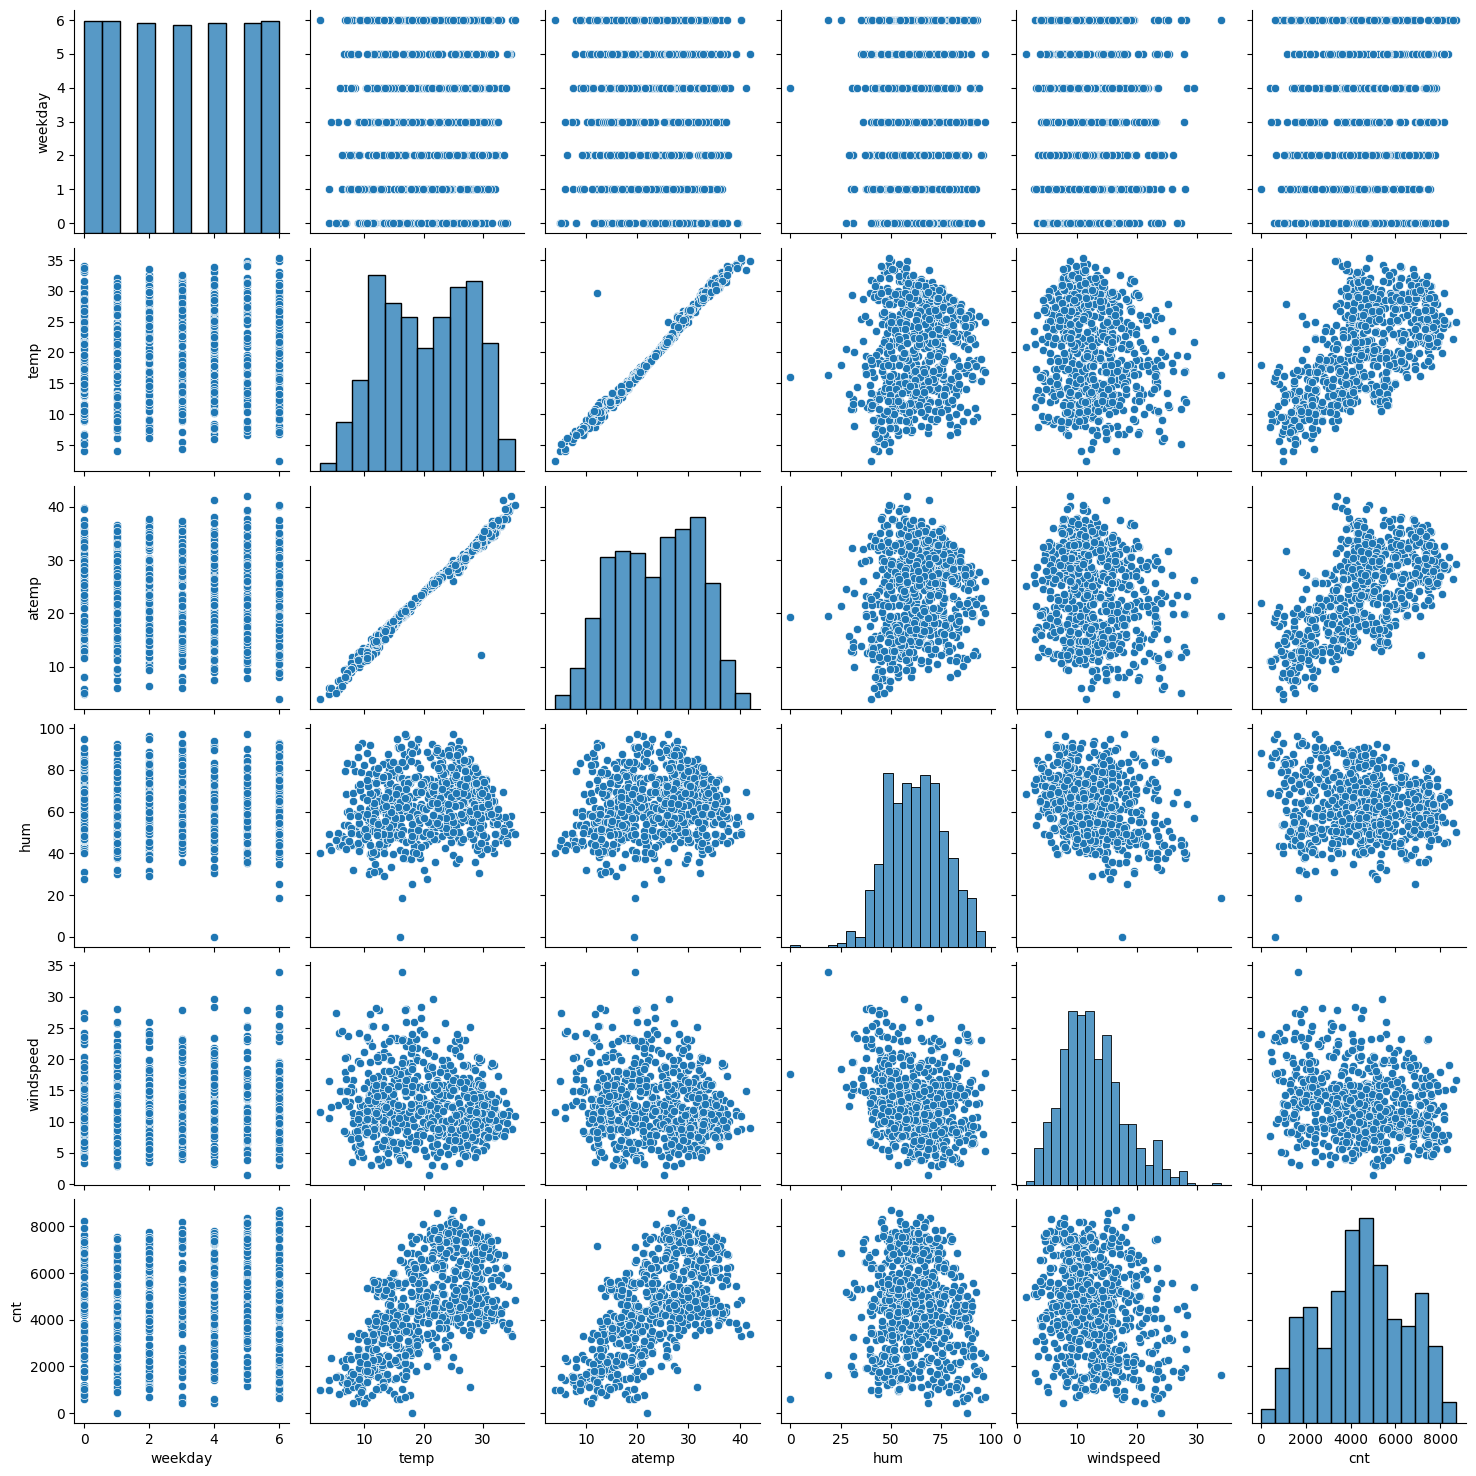

In [8]:
sns.pairplot(df[['weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

#### Pair plot Analysis
Temp and Temp a show some correlation with count.

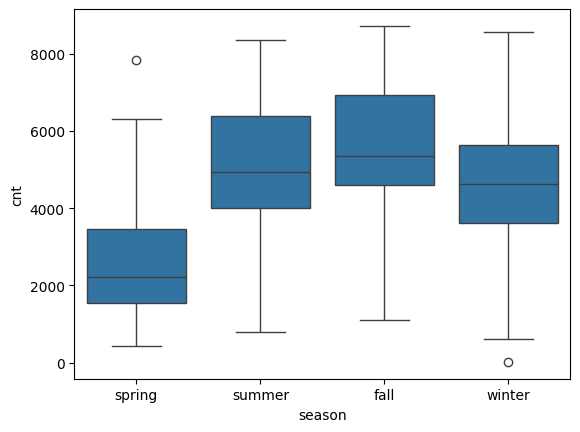

In [9]:
# Box plot for 'season' vs 'cnt'
sns.boxplot(x='season', y='cnt', data=df)
plt.show()

#### Season Analysis
Fall > Summer> Winter > Spring. 

Curious to understand why is spring the least when the weather is the best and temperature show direct correlation with count

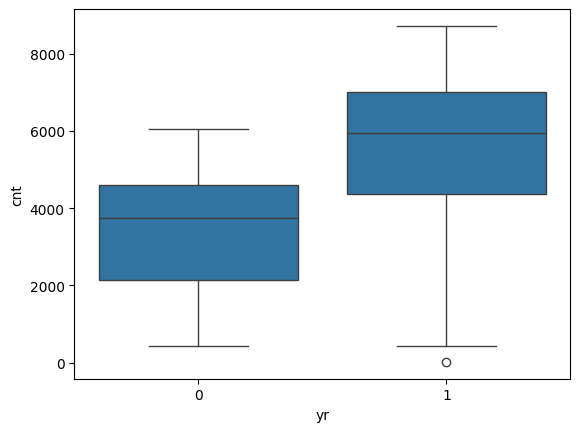

In [10]:
# Box plot for 'season' vs 'cnt'
sns.boxplot(x='yr', y='cnt', data=df)
plt.show()

#### Year Analysis
2019 had a lot more than 2018 when the company just started

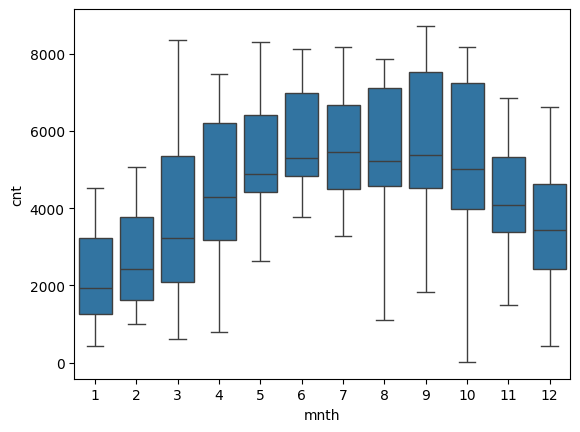

In [11]:
# Box plot for 'season' vs 'cnt'
sns.boxplot(x='mnth', y='cnt', data=df)
plt.show()

#### Month Analysis
mid year months when the weather is good, it has more 

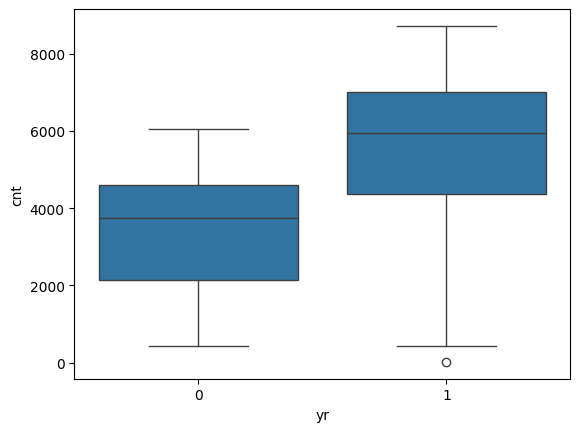

In [12]:
# Box plot for 'season' vs 'cnt'
sns.boxplot(x='yr', y='cnt', data=df)
plt.show()

#### Year Analysis
2019 had a lot more than 2018 when the company just started

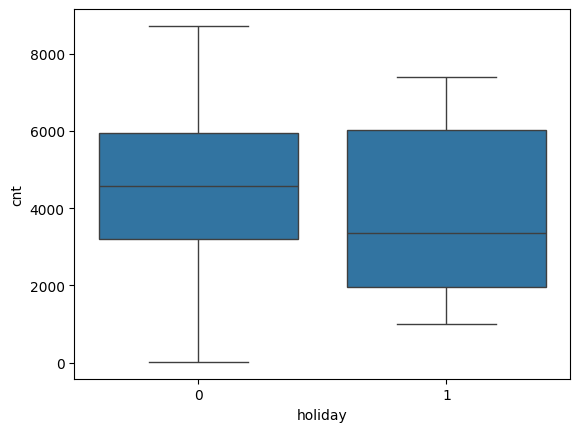

In [13]:
# Box plot for 'season' vs 'cnt'
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

#### Holiday Analysis
On average on holidays more people took bikes

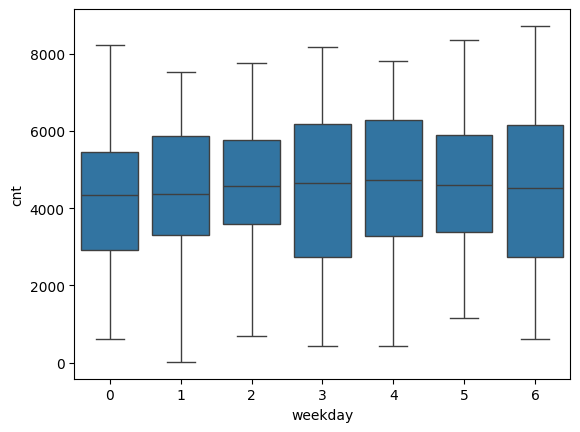

In [14]:
# Box plot for 'season' vs 'cnt'
sns.boxplot(x='weekday', y='cnt', data=df)
plt.show()

#### Weekday Analysis
No strong trend is seen

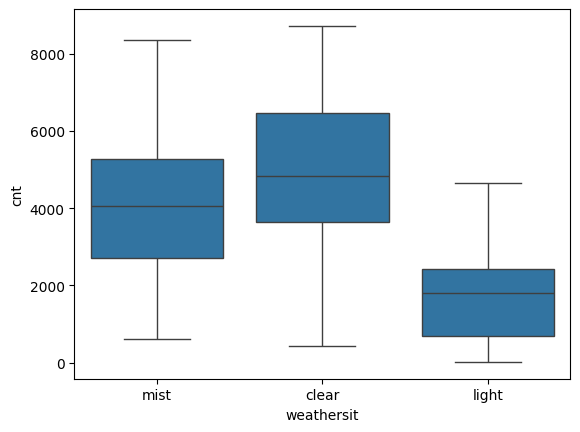

In [15]:
# Box plot for 'season' vs 'cnt'
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

#### Weather Situation Analysis
As expected bike rentals went down with extreme weather.

## MLR data preparation

### Dummy Variable Creation for MLR
Following categorical variables need to be converted to dummy variables
1. weathersit
2. season

In [16]:
#creating and appending dummy variables
weathersit_dummy= pd.get_dummies(df['weathersit'], drop_first=True)
season_dummy = pd.get_dummies(df['season'],drop_first=True)
display(weathersit_dummy.head())
display(season_dummy.head())
df = pd.concat([df,season_dummy, weathersit_dummy],axis=1)
display(df.info())

,light,mist
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False


,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
 16  spring      730 non-null    bool   
 17  summer      730 non-null    bool   
 18  winter      730 non-null    bool   
 19  light       730 non-null    b

None

In [17]:
#dropping season and weathersit
df.drop(['season', 'weathersit'], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  spring      730 non-null    bool   
 15  summer      730 non-null    bool   
 16  winter      730 non-null    bool   
 17  light       730 non-null    bool   
 18  mist        730 non-null    bool   
dtypes: bool(5), float64(4), int64

In [18]:
bool_columns = df.select_dtypes(include='bool').columns
print(bool_columns)
df[bool_columns] = df[bool_columns].astype(int)
df.info()

Index(['spring', 'summer', 'winter', 'light', 'mist'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  spring      730 non-null    int64  
 15  summer      730 non-null    int64  
 16  winter      730 non-null    int64  
 17  light       730 non-null    int64  
 18 

### Extracting more information from the date variable


In [19]:
# Converting Date column to date type variable
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['dteday'].head()

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: dteday, dtype: datetime64[ns]

In [20]:
df['dayofYear'] = df['dteday'].dt.dayofyear
df['dayofmonth'] = df['dteday'].dt.day
df['week'] = df['dteday'].dt.isocalendar().week
df['quarter'] = df['dteday'].dt.quarter
df[['quarter','week','dayofmonth','dayofYear']].head()

,quarter,week,dayofmonth,dayofYear
0,1,1,1,1
1,1,1,2,2
2,1,1,3,3
3,1,1,4,4
4,1,1,5,5


### Splitting the Data into Training and Testing Sets

In [21]:
from sklearn.model_selection import train_test_split

#removing non predictive features
non_predictive_columns = ['instant', 'dteday', 'casual', 'registered']  # Add any other columns that should not be used
# Now you can split your data
df_train, df_test = train_test_split(df.drop(columns=non_predictive_columns), train_size=0.7, test_size=0.3, random_state=100)


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Correct the list of numerical variables to scale
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'dayofmonth', 'dayofYear', 'week', 'quarter']

# Apply MinMax scaling to these columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Check the scaled DataFrame
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light,mist,dayofYear,dayofmonth,week,quarter
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,0,0,0.791209,0.500000,0.803922,1.000000
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0,0.579670,1.000000,0.588235,0.666667
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,1,0.167582,0.066667,0.156863,0.000000
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,0,0.997253,0.966667,0.000000,1.000000
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,1,0.321429,0.900000,0.313725,0.333333


In [23]:
y_train = df_train.pop('cnt')
x_train = df_train

## MLR Fitting and Feature Elimination (Hybrid Method)

### RFE Training

In [24]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()
rfe = RFE(estimator = lm, n_features_to_select = 12)
rfe = rfe.fit(x_train, y_train)

In [26]:
# Create a DataFrame to display the results in a clean table format
feature_ranking = pd.DataFrame({
    'Feature': x_train.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})

print(feature_ranking)

       Feature  Selected  Ranking
0           yr      True        1
1         mnth      True        1
2      holiday      True        1
3      weekday     False        7
4   workingday     False        6
5         temp      True        1
6        atemp      True        1
7          hum      True        1
8    windspeed      True        1
9       spring      True        1
10      summer     False        5
11      winter      True        1
12       light      True        1
13        mist     False        3
14   dayofYear      True        1
15  dayofmonth     False        2
16        week     False        4
17     quarter      True        1


In [27]:
col = x_train.columns[rfe.support_]
x_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'summer', 'mist', 'dayofmonth', 'week'], dtype='object')

### Manual elimination

In [28]:
X_train_rfe = x_train[col]

In [29]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [30]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [31]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          8.04e-177
Time:                        20:37:02   Log-Likelihood:                -4148.8
No. Observations:                 510   AIC:                             8324.
Df Residuals:                     497   BIC:                             8379.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3076.4396    299.246     10.281      0.0

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,mnth,154.33
11,dayofYear,143.28
0,const,65.33
4,temp,53.78
5,atemp,51.96
12,quarter,20.57
9,winter,3.60
8,spring,2.64
6,hum,1.23
7,windspeed,1.18


In [33]:
#Removing Month
X_train_rfe =X_train_rfe.drop('mnth', axis = 1)

In [34]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [35]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.0
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          8.88e-178
Time:                        20:37:02   Log-Likelihood:                -4149.3
No. Observations:                 510   AIC:                             8323.
Df Residuals:                     498   BIC:                             8373.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3166.5415    285.066     11.108      0.0

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.28
3,temp,53.72
4,atemp,51.86
11,quarter,19.20
10,dayofYear,16.87
8,winter,3.60
7,spring,2.63
5,hum,1.23
6,windspeed,1.18
9,light,1.11


In [37]:
#removing temp
X_train_rfe =X_train_rfe.drop('atemp', axis = 1)

In [38]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     227.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          8.79e-179
Time:                        20:37:02   Log-Likelihood:                -4149.7
No. Observations:                 510   AIC:                             8321.
Df Residuals:                     499   BIC:                             8368.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3190.2065    283.877     11.238      0.0

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.81
10,quarter,19.20
9,dayofYear,16.84
7,winter,3.55
3,temp,2.76
6,spring,2.63
4,hum,1.23
5,windspeed,1.14
8,light,1.11
1,yr,1.03


In [41]:
#removing quarter
X_train_rfe =X_train_rfe.drop('quarter', axis = 1)

In [42]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [43]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          3.83e-177
Time:                        20:37:02   Log-Likelihood:                -4156.4
No. Observations:                 510   AIC:                             8333.
Df Residuals:                     500   BIC:                             8375.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3336.9535    284.460     11.731      0.0

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.63
7,winter,3.23
9,dayofYear,3.05
3,temp,2.73
6,spring,2.60
4,hum,1.23
5,windspeed,1.14
8,light,1.10
1,yr,1.03
2,holiday,1.01


In [45]:
#removing date of year because of high p value
X_train_rfe =X_train_rfe.drop('dayofYear', axis = 1)

In [46]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.76e-178
Time:                        20:37:02   Log-Likelihood:                -4156.6
No. Observations:                 510   AIC:                             8331.
Df Residuals:                     501   BIC:                             8369.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3304.7488    279.989     11.803      0.0

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.89
6,spring,2.51
3,temp,2.47
7,winter,1.74
4,hum,1.23
5,windspeed,1.14
8,light,1.10
1,yr,1.03
2,holiday,1.01


### Feature Elimination Summary
#### Using RFE 
Using RFE following features were eliminated: 'weekday', 'workingday', 'summer', 'mist', 'dayofmonth', 'week'
#### Manual elimination
Using manual feature elimination following features were eliminated: 'dayofYear', 'quarter', 'temp', 'Month'

## Final Model Equation
### Final Equation for the model
cnt = 3304.75 + 1996.59⋅yr − 716.45⋅holiday + 4128.52⋅temp − 2090.98⋅hum − 1633.36⋅windspeed − 957.81⋅spring + 547.52⋅winter − 1760.71⋅light
### Key Take aways

**R-squared = 0.815**: The model explains 81.5% of the variance in the target variable (`cnt`), indicating good performance.  
**Adjusted R-squared = 0.812**: After accounting for the number of predictors, the model still explains 81.2% of the variance, avoiding overestimation.

### Statistically Significant Predictors (p < 0.05):
- **`yr`**: Coefficient = 1996.59, indicating a significant increase in `cnt` in 2019 compared to 2018.
- **`temp`**: Coefficient = 4128.52, meaning higher temperature corresponds to a large increase in bike rentals. 
- **`holiday`**: Coefficient = -716.45, meaning bike rentals are significantly lower on holidays. Using my domain knowledge should not be a linear relationship
- **`hum`** and **`windspeed`**: Negative predictors, meaning higher humidity and windspeed reduce the number of bike rentals.


## Residual Analysis of train data

In [49]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

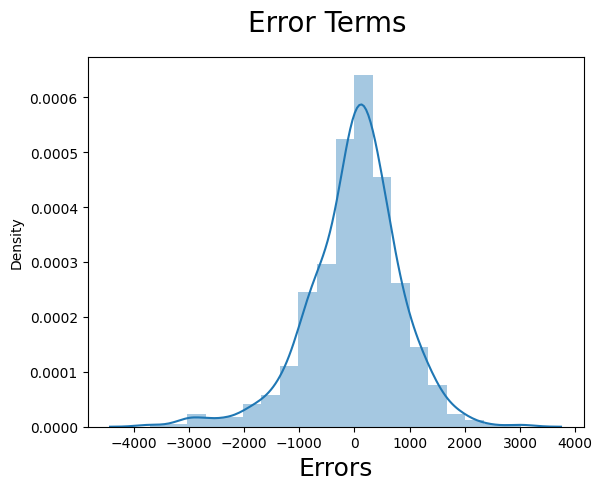

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Normality check for the error
The error is normally distributed and distributed around zero so assumption for MLR is correct

Text(0, 0.5, 'Count')

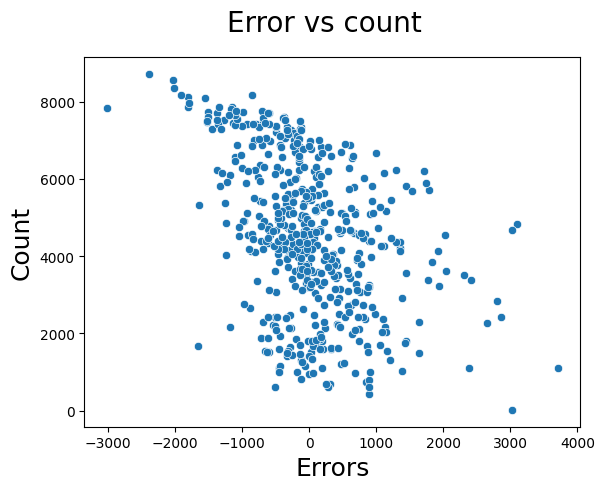

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(x=(y_train_pred-y_train), y=y_train)
fig.suptitle('Error vs count', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.ylabel('Count', fontsize = 18)     

### Error vs Count Analysis
The model might not be able to predict well at higher counts and might not have linear relationship

## Making Prediction
#### Applying the scaling on the test sets

In [52]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'dayofmonth', 'dayofYear', 'week', 'quarter']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.drop('const',axis = 1).columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [55]:
#Making test predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

### Scatter Plot for Y vs Y Predicted on Test Data

Text(0, 0.5, 'y_pred')

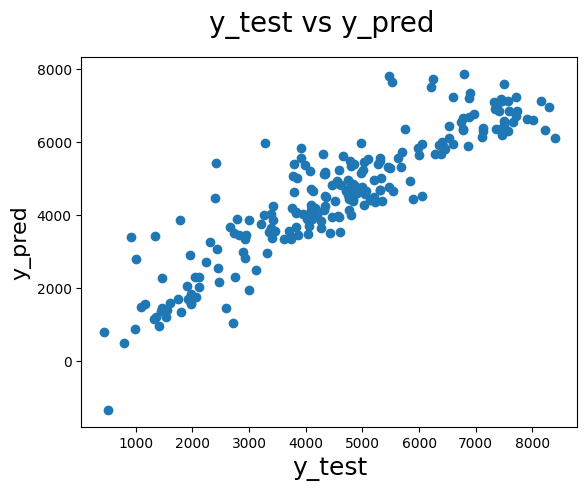

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Data Fit analysis on test data

In [57]:
from sklearn.metrics import r2_score

# Assuming y_test contains actual test target values and y_pred contains predicted values
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print(f'R-squared on test data: {r2}')

R-squared on test data: 0.8054479506746093


## Conclusion
The r2 value is acceptable and doesn't vary between test and training data so 

In [58]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      510 non-null    float64
 1   yr         510 non-null    int64  
 2   holiday    510 non-null    int64  
 3   temp       510 non-null    float64
 4   hum        510 non-null    float64
 5   windspeed  510 non-null    float64
 6   spring     510 non-null    int64  
 7   winter     510 non-null    int64  
 8   light      510 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 39.8 KB


## Final Model Equation
cnt = 3304.75 + 1996.59⋅yr − 716.45⋅holiday + 4128.52⋅temp − 2090.98⋅hum − 1633.36⋅windspeed − 957.81⋅spring + 547.52⋅winter − 1760.71⋅light
